# LIAR

Link: [https://www.cs.ucsb.edu/~william/data/liar_dataset.zip](https://www.cs.ucsb.edu/~william/data/liar_dataset.zip)

This jupyter notebook covers descriptive analysis of **LIAR** dataset. 


LIAR: A BENCHMARK DATASET FOR FAKE NEWS DETECTION
William Yang Wang, "Liar, Liar Pants on Fire": A New Benchmark Dataset for Fake News Detection, to appear in Proceedings of the 55th Annual Meeting of the Association for Computational Linguistics (ACL 2017), short paper, Vancouver, BC, Canada, July 30-August 4, ACL.

Note that we do not provide the full-text verdict report in this current version of the dataset,
but you can use the following command to access the full verdict report and links to the source documents:
wget http://www.politifact.com//api/v/2/statement/[ID]/?format=json

**Note:** This dataset contains 3 files, *test.tsv*, *train.tsv* and *valid.tsv*.


## Attributes

* **Column 1** - the ID of the statement ([ID].json).
* **Column 2** - the label.
* **Column 3** - the statement.
* **Column 4** - the subject(s).
* **Column 5** - the speaker.
* **Column 6** - the speaker's job title.
* **Column 7** - the state info.
* **Column 8** - the party affiliation.
* **Column 9-13** - the total credit history count, including the current statement.
    * 9: barely true counts.
    * 10: false counts.
    * 11: half true counts.
    * 12: mostly true counts.
    * 13: pants on fire counts.
* **Column 14** - the context (venue / location of the speech or statement).

## Setup and import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [3]:
# column names
colnames = ['ID', 'label', 'statement', 'subject', 'speaker', 'speaker_job', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context']

# read data from dataset
df = pd.read_csv('data/train.tsv', sep='\t', header=None, names=colnames)
df_test = pd.read_csv('data/test.tsv', sep='\t', header=None, names=colnames)
df_valid = pd.read_csv('data/valid.tsv', sep='\t', header=None, names=colnames)

## Analysis

### Count of records

In [4]:
# train dataset
len(df)

10240

In [6]:
# test dataset
len(df_test)

1267

In [7]:
# valid dataset
len(df_valid)

1284

### Data examples

In [8]:
df.head()

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


### More information about data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
ID                      10240 non-null object
label                   10240 non-null object
statement               10240 non-null object
subject                 10238 non-null object
speaker                 10238 non-null object
speaker_job             7343 non-null object
state_info              8032 non-null object
party_affiliation       10238 non-null object
barely_true_counts      10238 non-null float64
false_counts            10238 non-null float64
half_true_counts        10238 non-null float64
mostly_true_counts      10238 non-null float64
pants_on_fire_counts    10238 non-null float64
context                 10138 non-null object
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [10]:
df.describe(include='all')

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
count,10240,10240,10240,10238,10238,7343,8032,10238,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000,10138
unique,10240,6,10223,3827,2910,1184,84,23,NaN,NaN,NaN,NaN,NaN,4345
top,11012.json,half-true,On changing the rules for filibusters on presi...,health-care,barack-obama,President,Texas,republican,NaN,NaN,NaN,NaN,NaN,a news release
freq,1,2114,3,381,488,492,1009,4497,NaN,NaN,NaN,NaN,NaN,241
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.533210,13.286482,17.133718,16.434265,6.201407,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.973764,24.112936,35.846511,36.151688,16.128927,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,3.000000,3.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,12.000000,13.000000,11.000000,5.000000,NaN


### NaN values

Are there any NaN values in our data?

In [24]:
df.isnull().values.any()

True

Let's look at NaN values per each column:

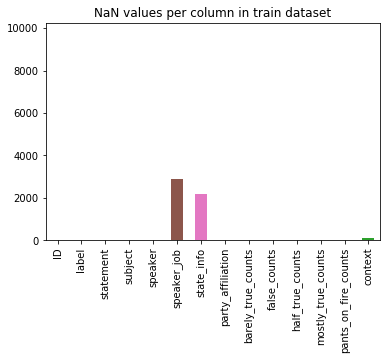

In [27]:
df.isnull().sum().plot(kind='bar', ylim=(0, len(df)), title='NaN values per column in train dataset')

### Attributes analysis

What is the distribution of fake news labels in our data?

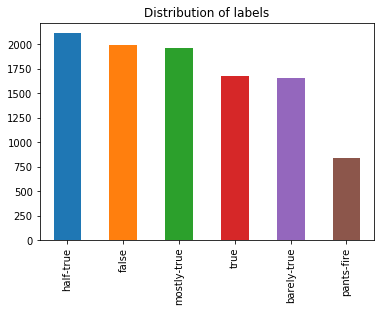

In [26]:
df['label'].value_counts().plot(kind='bar', title='Distribution of labels')